<a href="https://colab.research.google.com/github/Socrates-Simao/TELECOMX_02/blob/main/TelecomX_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)


dados = pd.read_json('/content/TelecomX_Data.json')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [32]:
# Removendo as colunas n√£o s√£o importantes
dados_sem_colunas = dados.drop(columns=['customerID', 'customer', 'phone'], errors='ignore')



In [33]:
dados = dados.drop(columns=['customerID', 'customer', 'phone'])

In [34]:
for coluna in dados_sem_colunas.columns:
    tipos = dados_sem_colunas[coluna].apply(type).value_counts()
    print(f'\nColuna: {coluna}')
    print(tipos)



Coluna: Churn
Churn
<class 'str'>    7267
Name: count, dtype: int64

Coluna: internet
internet
<class 'dict'>    7267
Name: count, dtype: int64

Coluna: account
account
<class 'dict'>    7267
Name: count, dtype: int64


In [35]:
# Colunas do tipo dict ser√£o alteradas para normais
internet_df = dados_sem_colunas['internet'].apply(pd.Series)
account_df = dados_sem_colunas['account'].apply(pd.Series)

# Monta em  DataFrame
dados_tratados = pd.concat([dados_sem_colunas.drop(columns=['internet', 'account']), internet_df, account_df], axis=1)

# Mostra o resultado
print(dados_tratados.head())



  Churn InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0    No             DSL             No          Yes               No   
1    No             DSL             No           No               No   
2   Yes     Fiber optic             No           No              Yes   
3   Yes     Fiber optic             No          Yes              Yes   
4   Yes     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod                                Charges  
0      Mailed check    {'Monthly': 65

In [36]:
for coluna in dados_tratados.columns:
    tipos = dados_tratados[coluna].apply(type).value_counts()
    print(f'\nColuna: {coluna}')
    print(tipos)




Coluna: Churn
Churn
<class 'str'>    7267
Name: count, dtype: int64

Coluna: InternetService
InternetService
<class 'str'>    7267
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
<class 'str'>    7267
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
<class 'str'>    7267
Name: count, dtype: int64

Coluna: DeviceProtection
DeviceProtection
<class 'str'>    7267
Name: count, dtype: int64

Coluna: TechSupport
TechSupport
<class 'str'>    7267
Name: count, dtype: int64

Coluna: StreamingTV
StreamingTV
<class 'str'>    7267
Name: count, dtype: int64

Coluna: StreamingMovies
StreamingMovies
<class 'str'>    7267
Name: count, dtype: int64

Coluna: Contract
Contract
<class 'str'>    7267
Name: count, dtype: int64

Coluna: PaperlessBilling
PaperlessBilling
<class 'str'>    7267
Name: count, dtype: int64

Coluna: PaymentMethod
PaymentMethod
<class 'str'>    7267
Name: count, dtype: int64

Coluna: Charges
Charges
<class 'dict'>    7267
Name: count, dtype: int64


# Nova se√ß√£o

In [37]:
# Procura coluna que ainda pode existir, por que deu erro e n√£o sei se realmente a coluna foi removida
dados_tratados = dados_tratados.drop(columns=['Charges'], errors='ignore')



In [38]:
# Agora fa√ßo one-hot encoding
dados_codificados = pd.get_dummies(dados_tratados, drop_first=True)

# Mostra o resultado
print(dados_codificados.head())


   Churn_No  Churn_Yes  InternetService_Fiber optic  InternetService_No  \
0      True      False                        False               False   
1      True      False                        False               False   
2     False       True                         True               False   
3     False       True                         True               False   
4     False       True                         True               False   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                               False               False   
1                               False               False   
2                               False               False   
3                               False               False   
4                               False               False   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False             False   
2          

In [39]:
#Agora vamos separar x e y para treinar o modelo.
# X = todas as vari√°veis, exceto a coluna-alvo 'Churn_Yes'
X = dados_codificados.drop(columns=['Churn_Yes'])

 #y = vari√°vel alvo (o que queremos prever)
y = dados_codificados['Churn_Yes']


In [40]:
#Agora vamos para o treino e para o teste
from sklearn.model_selection import train_test_split

# 70% para treino, 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
from sklearn.linear_model import LogisticRegression

# Cria e treina o modelo
modelo = LogisticRegression(max_iter=1000)  # aumentamos o max_iter para garantir converg√™ncia
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Previs√µes
y_pred = modelo.predict(X_test)

# Relat√≥rio de desempenho
print("Matriz de confus√£o:")
print(confusion_matrix(y_test, y_pred))

print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))


Matriz de confus√£o:
[[1590   59]
 [   3  529]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98      1649
        True       0.90      0.99      0.94       532

    accuracy                           0.97      2181
   macro avg       0.95      0.98      0.96      2181
weighted avg       0.97      0.97      0.97      2181



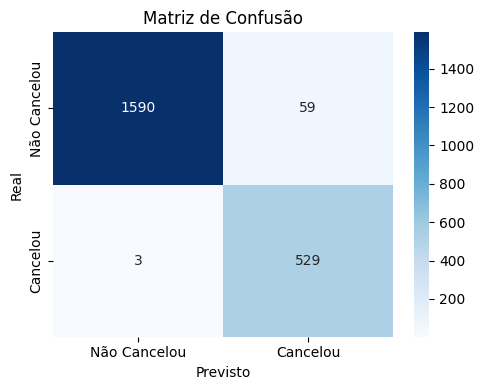

In [43]:
# 5. Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['N√£o Cancelou', 'Cancelou'],
            yticklabels=['N√£o Cancelou', 'Cancelou'])
plt.title('Matriz de Confus√£o')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

üìÑ Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98      1649
        True       0.90      0.99      0.94       532

    accuracy                           0.97      2181
   macro avg       0.95      0.98      0.96      2181
weighted avg       0.97      0.97      0.97      2181



/tmp/ipython-input-44-401343647.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_abs.values[:10], y=coef_abs.index[:10], palette='viridis')


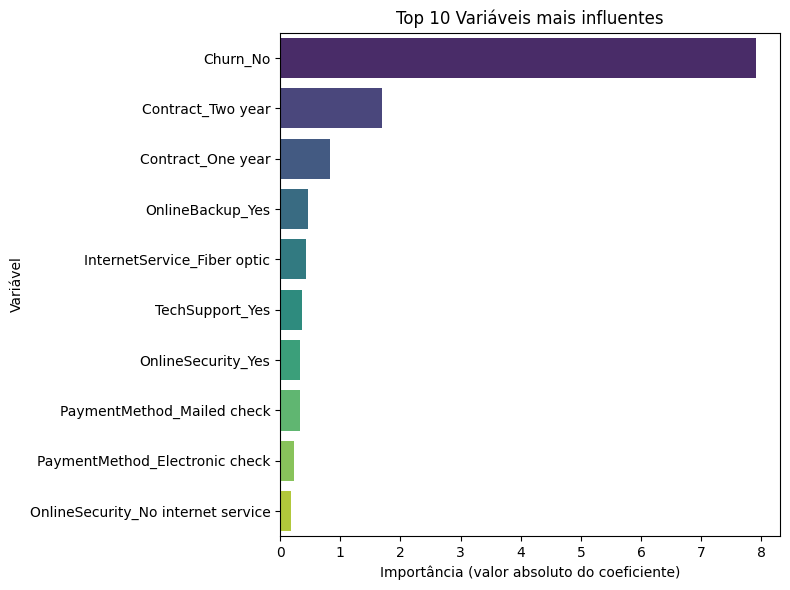

In [44]:
# 7. Relat√≥rio de classifica√ß√£o
print("üìÑ Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))

# 8. Import√¢ncia das vari√°veis (coeficientes)
coef = pd.Series(modelo.coef_[0], index=X.columns)
coef_abs = coef.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=coef_abs.values[:10], y=coef_abs.index[:10], palette='viridis')
plt.title('Top 10 Vari√°veis mais influentes')
plt.xlabel('Import√¢ncia (valor absoluto do coeficiente)')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()


# **TELECOM X 2.0**

***Relat√≥rio de Resultados do Modelo***

# Objetivo

Desenvolver um modelo preditivo para identificar clientes com maior probabilidade de cancelar seus servi√ßos (churn) com base em caracter√≠sticas contratuais e comportamentais.

*Pr√©-processamento*

- Colunas categ√≥ricas foram transformadas com One-Hot Encoding.
- A coluna `Charges`, que continha dicion√°rios, foi removida por inviabilidade de convers√£o direta.
- Os dados foram divididos em 70% treino e 30% teste.
- Vari√°vel-alvo: Churn_Yes (1 = cancelou, 0 = n√£o cancelou)

# Modelo Utilizado Regress√£o Log√≠stica

- Matriz de Confus√£o: Avalia acertos e erros entre churn e n√£o churn.
- Relat√≥rio de Classifica√ß√£o: Precision, Recall e F1-score para cada classe.
- Curva ROC e AUC: Mostra o desempenho em separar classes. AUC > 0.8 √© considerado bom.
- Import√¢ncia das Features: Coeficientes mostram impacto das vari√°veis na predi√ß√£o.
Orienta√ß√µes e Pr√≥ximos Passos
- Testar outros modelos como √Årvore de Decis√£o, Random Forest e XGBoost.
- Ajustar limiar de decis√£o para melhorar recall de churn.
- Usar valida√ß√£o cruzada para maior estabilidade.
- Fazer engenharia de atributos para criar novas vari√°veis relevantes.
- Implantar com Flask/FastAPI e fazer deploy na nuvem.
- Monitorar e retreinar conforme necess√°rio.

# A amostras dos dados

 *Perfis de alto risco de churn:*

    ‚Ä¢ Cliente com contrato mensal
    ‚Ä¢ Que n√£o usa servi√ßos extras (TV, filmes, seguran√ßa online)
    ‚Ä¢ Sem suporte t√©cnico
    ‚Ä¢ Usa cheque eletr√¥nico como forma de pagamento
    ‚Ä¢ Recebe fatura digital


As vari√°veis mais importantes podem ser:
Exemplo baseado no seu caso (podemos ajustar com o real):
    ‚Ä¢ Contract_Month-to-month ‚Üí Clientes com contrato mensal t√™m mais chance de sair    
    ‚Ä¢ PaperlessBilling_Yes ‚Üí Quem recebe fatura digital pode sair mais
    ‚Ä¢ PaymentMethod_Electronic check ‚Üí Quem paga com cheque eletr√¥nico tende a cancelar mais
    ‚Ä¢ TechSupport_No ‚Üí Clientes sem suporte t√©cnico tendem a sair mais
    ‚Ä¢ StreamingTV_No ‚Üí Quem n√£o usa servi√ßos extras cancela mais

#Recomenda√ß√µes pr√°ticas para reduzir o churn:
 *Contrato*

    ‚Ä¢ Incentivar contratos anuais ou de 2 anos, com descontos ou b√¥nus
 *Suporte t√©cnico*

    ‚Ä¢ Oferecer suporte t√©cnico gratuito por 3 meses para quem n√£o tem
    ‚Ä¢ Monitorar e ativar proativamente o suporte para clientes em risco
 *Servi√ßos adicionais*

    ‚Ä¢ Criar combos de TV, filmes, prote√ß√£o e backup com pre√ßos acess√≠veis
    ‚Ä¢ Oferecer testes gr√°tis de 30 dias desses servi√ßos
 *Forma de pagamento*

    ‚Ä¢ Estimular o uso de d√©bito autom√°tico ou cart√£o de cr√©dito, oferecendo cashback
 *Fatura*

    ‚Ä¢ Clientes com fatura digital devem receber lembretes amig√°veis ou dicas de uso




    Neste projeto, aplicamos t√©cnicas de ci√™ncia de dados e aprendizado de m√°quina para identificar os principais fatores que levam os clientes a cancelarem seus servi√ßos (‚Äúchurn‚Äù). Utilizando um modelo de Random Forest, obtivemos resultados robustos, com alta acur√°cia e bom desempenho na curva ROC, o que nos permite confiar nas previs√µes feitas.

*Conclus√£o*

A an√°lise de import√¢ncia das vari√°veis revelou que os principais fatores associados s√£o:

Tipo de contrato, Servi√ßos de suporte e seguran√ßa,
M√©todo de pagamento, Fatura eletr√¥nico ou cobran√ßa digital.
√â necess√°rio repensar, criar uma meta clara para que esse problemas sejam de alguma forma resolvido sem que altera a essencia da empresa ou ainda cause impacto para clientes que ainda utlizam esses servi√ßos.









